# Week 06

## NLTK Corpus

In [163]:
# nltk brown, inaugural
import nltk
nltk.download(['inaugural', 'brown'])

[nltk_data] Downloading package inaugural to
[nltk_data]     /Users/parkhaneul/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     /Users/parkhaneul/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [165]:
brown = nltk.corpus.brown

In [170]:
cfd1 = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories = genre)
)

genres = brown.categories()[:5]
modals = ['can', 'could', 'will', 'would', 'may', 'might']
cfd1.tabulate(conditions = genres, samples = modals)

                 can could  will would   may might 
     adventure    46   151    50   191     5    58 
belles_lettres   246   213   236   392   207   113 
     editorial   121    56   233   180    74    39 
       fiction    37   166    52   287     8    44 
    government   117    38   244   120   153    13 


In [195]:
# genre별로 modal의 빈도수를 가진 cfd
cfd2 = nltk.ConditionalFreqDist(
    (genre, modal)
    for genre in brown.categories()
    for modal in ['can', 'could', 'will', 'would', 'may', 'might']
    
    for word in brown.words(categories=genre) # 콜론 없어야 함
        if word.lower() == modal # candidate
)

cfd2.tabulate()

                  can could   may might  will would 
      adventure    48   154     7    59    51   194 
 belles_lettres   249   216   221   113   246   397 
      editorial   124    57    79    39   235   185 
        fiction    39   168    10    44    56   291 
     government   119    38   179    13   244   120 
        hobbies   276    59   143    22   269    83 
          humor    17    33     8     8    13    56 
        learned   367   159   336   128   340   321 
           lore   170   142   170    50   178   188 
        mystery    45   145    15    57    25   189 
           news    94    87    93    38   389   246 
       religion    84    59    79    12    72    69 
        reviews    45    40    47    26    61    48 
        romance    79   195    11    51    49   247 
science_fiction    16    49     4    12    17    80 


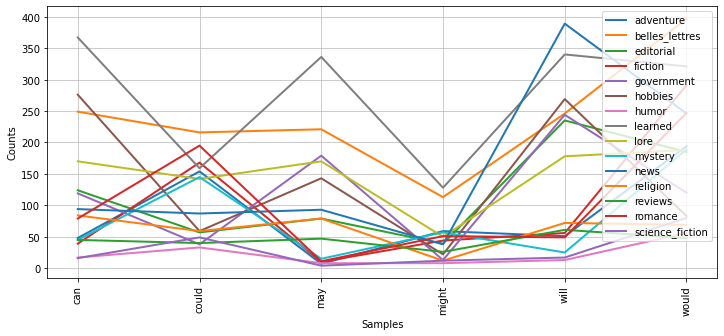

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [194]:
import matplotlib.pyplot as plt # plt라는 이름으로 import 하겠다
plt.figure(figsize=(12, 5)) # plt.figure() : 그림의 크기 조정 // figsize(가로, 세로)
cfd2.plot()

#### Inaugural
- 연설문 데이터

In [180]:
inaugural = nltk.corpus.inaugural

In [181]:
inaugural.fileids()[:7] # 연도-이름.txt

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt']

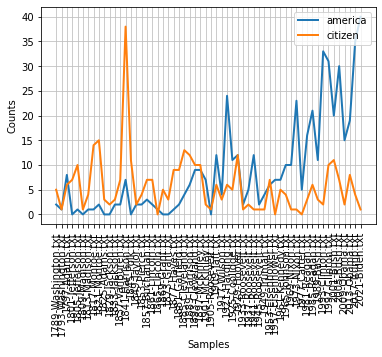

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [187]:
# inaugural에서 america, citizen의 빈도수, 연도별로

cfd3 = nltk.ConditionalFreqDist(
    (target_word, fileid) # x축, y축
    for fileid in inaugural.fileids()
    for target_word in ['america', 'citizen']
    
    for word in inaugural.words(fileids=fileid) # 콜론 없음 주의
        if word.lower().startswith(target_word)
)

cfd3.plot()

## Tuple & List

In [197]:
emptyT = ()
empty = tuple()

emptyL = []
emptyL = list()

emptyT, emptyL # 빈 튜플, 리스트

((), [])

#### 1.1 요소가 2개 이상일 때

In [198]:
listA = ['a', 'b']

tupleA = 'a', 'b' # 괄호 없이 더 많이 사용
tupleA = ('a', 'b')

tupleA, listA

(('a', 'b'), ['a', 'b'])

#### 1.2 요소가 1개일 때

In [199]:
listA = ['a']

tupleA = ('a',) # comma 필수
tupleA = 'a',

tupleA, listA

(('a',), ['a'])

In [201]:
ex = ('a') # comma 여부의 차이
type(ex), type(tupleA)

(str, tuple)

#### 2. 여러 변수 할당하기
- packing: 한 변수에 여러 개의 데이터를 할당하는 것
    - 리스트, 튜플 자체가 a = [1, 2, 3, 4]
- unpacking: 여러 변수에 하나의 데이터를 할당하는 것. 그것을 각각의 변수로 변환하는 것
    - a, b, c = [1, 2, 3]

In [202]:
name = 'lee'
a, b, c = name
a, b, c # unpacking

('l', 'e', 'e')

In [204]:
# 변수의 수가 부족하면 어떻게 될까?
university = 'hufs'
w1, w2, w3 = university
w1, w2, w3 # 변수의 수가 부족할 경우 에러 발생

ValueError: too many values to unpack (expected 3)

In [208]:
# 변수의 수가 더 많으면 어떻게 될까?
w1, w2, w3, w4, w5 = university
w1, w2, w3, w4, w5 # 똑같이 에러 발생

ValueError: not enough values to unpack (expected 5, got 4)

In [210]:
# 값 교환
pwd = 'abcd'
userId = 'hello'

# pwd = 'hello', userId = 'abcd'

temp1 = pwd
temp2 = userId
pwd = temp2
userId = temp1

# 튜플을 쓰면?

pwd, userId = userId, pwd
pwd, userId

('abcd', 'hello')

#### 3. 연산
- 리스트도 동일함

In [211]:
('a',) + ('b', 'c')

('a', 'b', 'c')

In [212]:
('a', 'b') * 4

('a', 'b', 'a', 'b', 'a', 'b', 'a', 'b')

In [213]:
a = 1, 2
b = 1, 3

a < b, a, b

(True, (1, 2), (1, 3))

#### 4. 순회하기

In [1]:
a = 1, 2, 3, 4, 5

for i in a:
    print(i)

1
2
3
4
5


#### 5. list comprehension
- tuple? (x)

In [215]:
#1. 튜플로 감싸기
tuple([word for word in a])

#2. 느리고 잘 쓰이지 않음
*[word for word in a],

(1, 2, 3, 4, 5)

#### 6. 튜플은 불변 객체이다.
- a = 1, 2, 3, 4
- 추가, 삭제 등 불가능
- 코드를 수정할 때 튜플을 수정할 수 없게 하는 용도로 사용
- key 값을 저장

blue=1 white2 ...
- 메모리 사용 적음

In [216]:
a = (1,) 
b = (1, 2, 3)
id(a), id(a+b) # 수정이 아니라 다른 객체에 할당. 튜플은 수정이 불가능하다.

(140635096218112, 140634877762192)

#### 7. 형 변환
- tuple()
- ()

In [217]:
tuple('cat'), ['cat']

(('c', 'a', 't'), ['cat'])

In [218]:
list('cat'), ['cat'] # 사용하지 말 것

(['c', 'a', 't'], ['cat'])

In [219]:
b[0] # 튜플도 인덱스 사용 가능

1

- 튜플의 장점:
    - 타인이 변경하는 걸 방지할 수 있음 ** 가장 큰 차이점 & 사용 이유
    - 메모리 사용이 적음
- 리스트 장점:
    - 데이터 순차적으로 파악하기 쉬움
    - 중복되는 데이터를 포함할 수 있음

### List 관련 함수

#### 1. 항목 변경하기

In [53]:
days = ['월', '화', '수', '목']

# 'fri' 추가하기
days.append('fri') # 마지막에 요소 추가
# 할당 필요없고 바로 값 변하지만 반환되지는 않음

In [54]:
days

['월', '화', '수', '목', 'fri']

In [55]:
days.insert(2, 'Sat') # offset 지정 가능 // 리스트.insert(index, 추가할 요소)

In [56]:
days

['월', '화', 'Sat', '수', '목', 'fri']

In [57]:
# 병합하기
days.extend(['토', '일']) # 리스트 안의 요소가 뒤에 추가됨
days

['월', '화', 'Sat', '수', '목', 'fri', '토', '일']

In [58]:
listA = ['토', '일']
days.append(listA) # append를 사용할 경우 리스트 자체가 추가됨
days

['월', '화', 'Sat', '수', '목', 'fri', '토', '일', ['토', '일']]

In [59]:
days += listA # 리스트 자체가 아니라 안에 있는 요소가 추가됨 == extend
days

['월', '화', 'Sat', '수', '목', 'fri', '토', '일', ['토', '일'], '토', '일']

In [60]:
# offset
days[-3] = '공휴일' # 뒤에서 3번째 요소가 '공휴일'로 변경됨
days

['월', '화', 'Sat', '수', '목', 'fri', '토', '일', '공휴일', '토', '일']

In [61]:
days[:3] = 1, 2, 3 # 개수 달라도 상관없음
days

[1, 2, 3, '수', '목', 'fri', '토', '일', '공휴일', '토', '일']

In [62]:
days[:3] = 10, 20 # 개수를 다르게 해보자.
days # 앞의 두 요소가 10, 20으로 바뀌고 세 번째 자리에 있던 3이 사라짐

[10, 20, '수', '목', 'fri', '토', '일', '공휴일', '토', '일']

In [63]:
days[:3] = 'cat'
days

['c', 'a', 't', '목', 'fri', '토', '일', '공휴일', '토', '일']

In [64]:
# a = 1, 2, 3, 4, 5
a = list(range(1, 6)) # list로 감싼다.
a

[1, 2, 3, 4, 5]

#### 삭제하기

In [65]:
days

['c', 'a', 't', '목', 'fri', '토', '일', '공휴일', '토', '일']

In [66]:
#1. offset
del days[0] # 자리가 보존되지 않고 아이템이 하나씩 앞당겨짐
days

['a', 't', '목', 'fri', '토', '일', '공휴일', '토', '일']

In [67]:
#2. 특정한 값 삭제
days.remove('토') # 여러개가 있으면 처음 것만 삭제
days

['a', 't', '목', 'fri', '일', '공휴일', '토', '일']

In [68]:
#3. pop(index) default = -1, 맨 마지막 요소를 삭제
days.pop(0) # 반환해줌

'a'

In [69]:
days

['t', '목', 'fri', '일', '공휴일', '토', '일']

In [70]:
# clear
days.clear() # 리스트 내 요소를 전부 삭제하고 빈 리스트로 만들고 싶을 때 사용

In [71]:
days

[]

#### 값 찾기

In [72]:
a = list(range(5))
# a = [0, 1, 2, 3, 4]
a.index(2)

2

In [73]:
# 값이 리스트 안에 있는지 확인
3 in a

True

#### 정렬하기
- 리스트.sort(reverse) : 정렬한 뒤 값 반환하지 않고 기존값 변경되어 있음.
- sorted(리스트, reverse) : 정렬된 복사본을 반환, 기존 값은 유지

- 리스트.reverse()
- list(reversed(fltmxm))

In [89]:
unsorted_list = [5, 2, 3, 1, 0, 4] # 정렬되지 않은 리스트 
sorted(unsorted_list) # 오름차순으로 정렬

[0, 1, 2, 3, 4, 5]

In [90]:
unsorted_list # sorted() 함수를 쓴 뒤에 unsorted_list 자체가 변경되지는 않고 그대로임을 알 수 있음

[5, 2, 3, 1, 0, 4]

In [91]:
sorted(unsorted_list, reverse = True) # 내림차순으로 정렬 후 반환

[5, 4, 3, 2, 1, 0]

In [92]:
unsorted_list # 역시나 기존 값 유지

[5, 2, 3, 1, 0, 4]

In [93]:
sorted_list = sorted(unsorted_list) # 새로 변수를 만들어 sorted(리스트)를 할당해 사용 가능
sorted_list

[0, 1, 2, 3, 4, 5]

In [94]:
unsorted_list.sort()
unsorted_list # 오름차순 정렬되어 있음

[0, 1, 2, 3, 4, 5]

In [95]:
unsorted_list.reverse()
unsorted_list # 요소의 순서가 거꾸로 되어 나타남 (내림차순 정렬 X, 요소의 순서를 거꾸로 해주는 것)

[5, 4, 3, 2, 1, 0]

In [96]:
# reverse를 사용하는 또 다른 방법
list(reversed(unsorted_list)) #list()로 감싸줘야 함.

[0, 1, 2, 3, 4, 5]

#### 할당하기
- `=`으로 할당할 때는 하나의 값이 변하면 같이 변함. 메모리 주소를 참조하고 있기 때문
- shallow copy
    - a가 변해도 b가 변하지 않게 하는 복사
    - 리스트.copy()
    - list(리스트)
    - 리스트[:]
- deep copy
    - 하위에 중첩된 리스트 요소가 바뀌는 것을 방지

In [97]:
a = [0, 1, 2, 3, 4]

In [99]:
b = a # [0, 1, 2, 3, 4]에 a, b가 메모리 주소를 참조함
b[0] = 7 # b의 첫 번째 요소를 7로 바꿨으나 (a 건들지 않음)
a, b # a의 첫 번째 요소도 7로 바뀐 것을 확인 가능

([7, 1, 2, 3, 4], [7, 1, 2, 3, 4])

In [100]:
id(a), id(b) # 주소값 동일

(140634006587968, 140634006587968)

In [103]:
# shallow copy
b = a.copy()
c = list(a)
d = a[:]

print(b, c, d) # 동일한 요소를 가지고 있는 리스트
print(id(a), id(b), id(c), id(d)) # 주소값이 다 다름

[7, 1, 2, 3, 4] [7, 1, 2, 3, 4] [7, 1, 2, 3, 4]
140634006587968 140635083063808 140635083168512 140635083124352


In [111]:
b[0] = 9
a, b # a는 그대로이고, b의 첫 번째 요소만 바뀜 (주소값이 다르기 때문)

([7, 1, 2, 3, 4, [0, 7, 8]], [9, 1, 2, 3, 4])

In [104]:
a.append([6, 7, 8])

In [105]:
a

[7, 1, 2, 3, 4, [6, 7, 8]]

In [106]:
e = a.copy()
e

[7, 1, 2, 3, 4, [6, 7, 8]]

In [107]:
a[-1][0] = 0
a, e # 가변객체가 들어가면 e도 같이 바뀜

([7, 1, 2, 3, 4, [0, 7, 8]], [7, 1, 2, 3, 4, [0, 7, 8]])

In [108]:
# deep copy
import copy
f = copy.deepcopy(a)
f

[7, 1, 2, 3, 4, [0, 7, 8]]

In [109]:
f[-1][-1] = 9
a, f # a는 그대로, f는 바뀜

([7, 1, 2, 3, 4, [0, 7, 8]], [7, 1, 2, 3, 4, [0, 7, 9]])

#### 순회하기
- zip() : 여러 개 리스트 동시 순회
- enumerate() : 인덱스도 함께 돌고자 할 때 (list, range)
- range()

In [112]:
a = [1, 2, 3]
b = ['mon', 'tue', 'wed', 'thu']

for itemA, itemB in zip(a, b): # 아이템 수가 적은 시퀀스에서 완료됨
    print(itemA, itemB)

1 mon
2 tue
3 wed


In [113]:
list(zip(a, b))

[(1, 'mon'), (2, 'tue'), (3, 'wed')]

In [115]:
dict(zip(a, b))

{1: 'mon', 2: 'tue', 3: 'wed'}

In [116]:
# enumerate()
for idx, itemA in enumerate(b):
    print((idx, itemA))

(0, 'mon')
(1, 'tue')
(2, 'wed')
(3, 'thu')


#### 리스트 컴프리핸션

In [117]:
ex = [(nal, day) for nal, day in zip(a, b)]
ex

[(1, 'mon'), (2, 'tue'), (3, 'wed')]

#### 연습문제
- 리스트 -> for문으로
for문을 사용하여 ex 구현

In [118]:
result = []
for nal, day in zip(a, b):
    result.append((nal, day))
result

[(1, 'mon'), (2, 'tue'), (3, 'wed')]

In [119]:
# for day in b
    # for nal in a
[(nal, day) for nal in a for day in b]

[(1, 'mon'),
 (1, 'tue'),
 (1, 'wed'),
 (1, 'thu'),
 (2, 'mon'),
 (2, 'tue'),
 (2, 'wed'),
 (2, 'thu'),
 (3, 'mon'),
 (3, 'tue'),
 (3, 'wed'),
 (3, 'thu')]

In [126]:
# 문제 1
sentence = "don't judge a book by its cover"
# [(대문자, 타이틀, 글자수),]로 저장된 리스트 만들기

In [129]:
[(word.upper(), word.title(), len(word)) for word in sentence.split(' ')]

[("DON'T", "Don'T", 5),
 ('JUDGE', 'Judge', 5),
 ('A', 'A', 1),
 ('BOOK', 'Book', 4),
 ('BY', 'By', 2),
 ('ITS', 'Its', 3),
 ('COVER', 'Cover', 5)]

In [130]:
## 첫 글자만 대문자로 바꾸는  함수 title
lowerword = 'python'
lowerword.title()

'Python'

In [131]:
# 문제2
text = [
    ['hello', 'guys'],
    ['how', 'are', 'you']
]

#2-1. 문장으로 구성된 리스트 만들기
    # ['hello guys', 'how are you']
#2-2. 전체 단어를 하나의 리스트로 가져오기
    # ['hello', '', '', '', '']
#2-3. 전체를 스트링으로 가져오기

In [141]:
#2-1.
[' '.join(sents) for sents in text]

['hello guys', 'how are you']

In [147]:
# for문으로 해보면?

result1 = []

for sents in text:
    result1.append(' '.join(sents))

result1

['hello guys', 'how are you']

In [151]:
# 2-2.
[word for sents in text for word in sents]

['hello', 'guys', 'how', 'are', 'you']

In [152]:
# for문으로 해보면?

result2 = []

for sents in text:
    for word in sents:
        result2.append(word)

result2

['hello', 'guys', 'how', 'are', 'you']

In [156]:
# 2-3.
' '.join([word for sents in text for word in sents])

'hello guys how are you'

In [159]:
# for 문으로 해보면?

for sents in text:
    for word in sents:
        print(word, end=' ')

hello guys how are you 